In [1]:
import numpy as np
import pulp
%matplotlib inline
import matplotlib.pyplot as plt

earnings = pulp.LpProblem("Earnings", pulp.LpMaximize)

t = pulp.LpVariable('t', lowBound=3, cat='Continuous')
b = pulp.LpVariable('b', lowBound=0, cat='Continuous')

In [2]:
# Objective Function
earnings += 10*t + 7*b, "E"

# Constraints
earnings += t >= 3
earnings += t <= 8
earnings += b >= 0
earnings += t + b <= 20

In [3]:
print(earnings)

Earnings:
MAXIMIZE
7*b + 10*t + 0
SUBJECT TO
_C1: t >= 3

_C2: t <= 8

_C3: b >= 0

_C4: b + t <= 20

VARIABLES
b Continuous
3 <= t Continuous



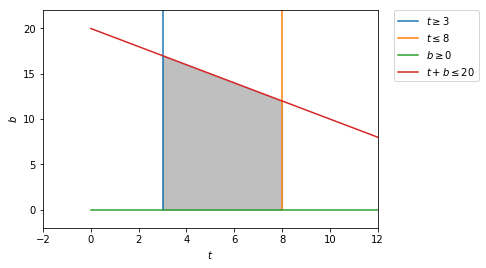

In [9]:
# Construct lines
# t >= 0
x = np.linspace(0, 50, 500)
t1 = x*0 + 3
t2 = x*0 + 8
# b >= 0
b1 = x*0
# t + b <= 20
y1 = -x + 20


# Make plot
plt.plot(t1, x, label=r'$t\geq3$')
plt.plot(t2, x, label=r'$t\leq8$')
plt.plot(x, b1, label=r'$b \geq 0$')
plt.plot(x, y1, label=r'$t + b \leq 20$')
plt.xlim((-2, 12))
plt.ylim((-2, 22))
plt.xlabel(r'$t$')
plt.ylabel(r'$b$')

# Fill feasible region
plt.fill_between(np.linspace(3,8,500), b1, (20 - np.linspace(3,8,500)), color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [5]:
earnings.solve()
print(pulp.LpStatus[earnings.status])

Optimal


In [6]:
for var in earnings.variables():
    print(var.name + " = " + str(var.varValue))

b = 12.0
t = 8.0


In [7]:
print(pulp.value(earnings.objective))

164.0
